In [1]:
import numpy as np
from Simul import get_m1_m2,get_RQ_MOA,get_R_simul,get_RQ_MOA2,get_R_simul_wf,get_R_simul_wf2,RK4_ZZ2,Kuramoto_MF_CHIMERA,gen_dist2,gen_dist
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
from parfor import parfor

In [5]:
alpha = 0.2
beta = 0.2
eta1 = 0.1
eta2 = 0.0
shift = 0
N = 10000
Q1 = 1
Q2 = 0.6
t_end = 20_001
t = np.arange(0,t_end,0.1)


In [ ]:
import numpy as np
from Simul import get_m1_m2,get_RQ_MOA,get_R_simul,get_RQ_MOA2,get_R_simul_wf,get_R_simul_wf2,RK4_ZZ2,Kuramoto_MF_CHIMERA,gen_dist2,gen_dist
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
from parfor import parfor

In [ ]:
alpha = 0.2
beta = 0.2
eta1 = 0.1
eta2 = 0.0
shift = 0
N = 10000
Q1 = 1
Q2 = 0.6
t_end = 20_001
t = np.arange(0,t_end,0.1)


In [ ]:
N1 = N2 = N
A1 = np.sqrt(Q1)
A2 = np.sqrt(Q2)
a1 =  A1 *np.exp(0j)
b1 =  a1 * np.exp(np.pi*1j)
a2 =  A2*np.exp(shift*1j)
b2 =  a2* np.exp(np.pi*1j)
T1 = np.r_[np.zeros(int((1/2 + eta1/2)*N)),np.pi* np.ones(N - int((1/2 + eta1/2)*N))]
T2 = gen_dist(N,a2,b2,eta2)
Theta =  np.r_[T1,T2]

(array([ 51.,  51.,  56.,  60.,  69.,  81., 100., 131., 181., 268., 421.,
        645., 785., 643., 417., 266., 178., 130., 100.,  81.,  69.,  60.,
         55.,  52.,  50.,  50.,  52.,  55.,  60.,  69.,  81., 100., 130.,
        178., 266., 417., 643., 785., 645., 421., 268., 181., 131., 100.,
         81.,  69.,  60.,  56.,  51.,  51.]),
 array([-1.5682828 , -1.44271964, -1.31715647, -1.19159331, -1.06603014,
        -0.94046698, -0.81490381, -0.68934065, -0.56377748, -0.43821432,
        -0.31265115, -0.18708798, -0.06152482,  0.06403835,  0.18960151,
         0.31516468,  0.44072784,  0.56629101,  0.69185417,  0.81741734,
         0.9429805 ,  1.06854367,  1.19410683,  1.31967   ,  1.44523316,
         1.57079633,  1.69635949,  1.82192266,  1.94748582,  2.07304899,
         2.19861215,  2.32417532,  2.44973848,  2.57530165,  2.70086481,
         2.82642798,  2.95199114,  3.07755431,  3.20311747,  3.32868064,
         3.4542438 ,  3.57980697,  3.70537013,  3.8309333 ,  3.95649646,
 

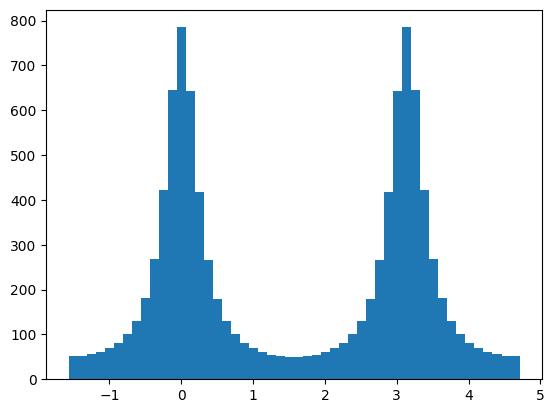

In [ ]:
plt.hist(T2,bins=50)

In [ ]:
N1,N2 = N,N
K = 1
alphas = np.linspace(0,np.pi/2,50)
betas = np.linspace(0,1,51)[1:]


R1s = []
R2s = []
Q1s = []
Q2s = []

for beta in tqdm(betas):

    @parfor(alphas,args=(beta,),bar=False)
    def ParFOR(alpha,beta):
        (Z1as,Z1bs,Z2as,Z2bs) = RK4_ZZ2(Kuramoto_MF_CHIMERA,Theta.copy(),t,args=(N1,N2,beta,alpha,K))
        R1 = np.abs(Z1as)[::1000]
        R2 = np.abs(Z1bs)[::1000]
        Q1 = np.abs(Z2as)[::1000]
        Q2 = np.abs(Z2bs)[::1000]
        
        return R1,R2,Q1,Q2
    R1,R2,Q1,Q2 = zip(*ParFOR)
    R1s.append(R1)
    R2s.append(R2)
    Q1s.append(Q1)
    Q2s.append(Q2)



  0%|          | 0/50 [00:00<?, ?it/s]

In [6]:
N1 = N2 = N
A1 = np.sqrt(Q1)
A2 = np.sqrt(Q2)
a1 =  A1 *np.exp(0j)
b1 =  a1 * np.exp(np.pi*1j)
a2 =  A2*np.exp(shift*1j)
b2 =  a2* np.exp(np.pi*1j)
T1 = np.r_[np.zeros(int((1/2 + eta1/2)*N)),np.pi* np.ones(N - int((1/2 + eta1/2)*N))]
T2 = gen_dist(N,a2,b2,eta2)
Theta =  np.r_[T1,T2]

(array([ 51.,  51.,  56.,  60.,  69.,  81., 100., 131., 181., 268., 421.,
        645., 785., 643., 417., 266., 178., 130., 100.,  81.,  69.,  60.,
         55.,  52.,  50.,  50.,  52.,  55.,  60.,  69.,  81., 100., 130.,
        178., 266., 417., 643., 785., 645., 421., 268., 181., 131., 100.,
         81.,  69.,  60.,  56.,  51.,  51.]),
 array([-1.5682828 , -1.44271964, -1.31715647, -1.19159331, -1.06603014,
        -0.94046698, -0.81490381, -0.68934065, -0.56377748, -0.43821432,
        -0.31265115, -0.18708798, -0.06152482,  0.06403835,  0.18960151,
         0.31516468,  0.44072784,  0.56629101,  0.69185417,  0.81741734,
         0.9429805 ,  1.06854367,  1.19410683,  1.31967   ,  1.44523316,
         1.57079633,  1.69635949,  1.82192266,  1.94748582,  2.07304899,
         2.19861215,  2.32417532,  2.44973848,  2.57530165,  2.70086481,
         2.82642798,  2.95199114,  3.07755431,  3.20311747,  3.32868064,
         3.4542438 ,  3.57980697,  3.70537013,  3.8309333 ,  3.95649646,
 

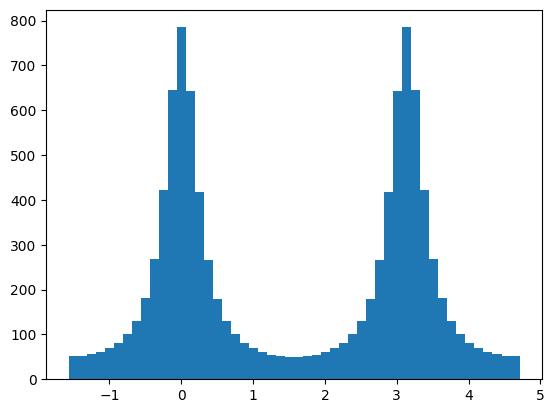

In [4]:
plt.hist(T2,bins=50)

In [7]:
N1,N2 = N,N
K = 1
alphas = np.linspace(0,np.pi/2,50)
betas = np.linspace(0,1,51)[1:]


R1s = []
R2s = []
Q1s = []
Q2s = []

for beta in tqdm(betas):

    @parfor(alphas,args=(beta,),bar=False)
    def ParFOR(alpha,beta):
        (Z1as,Z1bs,Z2as,Z2bs) = RK4_ZZ2(Kuramoto_MF_CHIMERA,Theta.copy(),t,args=(N1,N2,beta,alpha,K))
        R1 = np.abs(Z1as)[::1000]
        R2 = np.abs(Z1bs)[::1000]
        Q1 = np.abs(Z2as)[::1000]
        Q2 = np.abs(Z2bs)[::1000]
        
        return R1,R2,Q1,Q2
    R1,R2,Q1,Q2 = zip(*ParFOR)
    R1s.append(R1)
    R2s.append(R2)
    Q1s.append(Q1)
    Q2s.append(Q2)



  0%|          | 0/50 [00:00<?, ?it/s]

KeyboardInterrupt: 